In [1]:
from pipeNetwork import pipeNetwork
from containerClass import container
import numpy as np
from scipy.integrate import solve_ivp
import igraph
from calcTw import calcTw
from calcQ import calcQ
from containerClass import container
#from systemDefinitions import system,nodes,nodes1,pipeSections,pipeSections1
from systemDefinitions import system,pipeSections,pipeSections1, pipeSections3,orificeDiam3,pipeSections4,pipeSections0,orificeDiam0
from orificeForward import main_nozzle_forward, mass_critical
import matplotlib.pyplot as plt
from scipy.optimize import fsolve,root
#!pip install --user --upgrade pixiedust

In [2]:
import pixiedust

Pixiedust database opened successfully


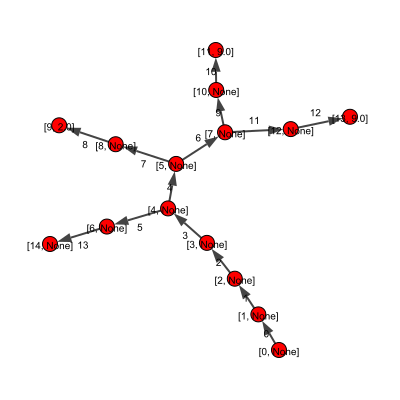

In [3]:
#%%pixie_debugger
net1 = pipeNetwork()
net1.addAllPipes(pipeSections3,orificeDiam3)
net0 = pipeNetwork()
net0.addAllPipes(pipeSections0,orificeDiam0)

net1.t.es["MFR"] = 10
net1.t.es["P0i"] = 1
net1.t.es[6]["P0i"] = 2
net1.t.vs["calculated"] = True
net1.propagateMFR(net1.t.vs[5],net1.t.es[6],net1.t.es[7])

net1.plot("MFR","index")

In [4]:
net1.t.vs[4]['M'] = 0.2
net1.t.vs[4]['T0'] = 300
net1.t.vs[4]['P0'] = 10000
net1.t.vs[4]['P'] = 9000
net1.t.vs[4]['T'] = 273
net1.t.vs[4]['rho'] = 1.0
net1.t.es['L'] = 19
net1.t.es['D'] = 0.1
#net1.t.es['f'] = 0.005
net1.Tw = 300
net1.t.vs[4]

igraph.Vertex(<igraph.Graph object at 0x00000224BC1EAB88>, 4, {'type': 'tee', 'x': None, 'y': None, 'z': None, 'M': 0.2, 'T0': 300, 'T': 273, 'P0': 10000, 'P': 9000, 'rho': 1.0, 'D': 0, 'MFR': None, 'calculated': True, 'name': 5})

In [5]:
net1.t.vs[3]

igraph.Vertex(<igraph.Graph object at 0x00000224BC1EAB88>, 3, {'type': 'coupling', 'x': None, 'y': None, 'z': None, 'M': None, 'T0': None, 'T': None, 'P0': None, 'P': None, 'rho': None, 'D': 0, 'MFR': None, 'calculated': True, 'name': 4})

In [6]:
net1.t.es[2]

igraph.Edge(<igraph.Graph object at 0x00000224BC1EAB88>, 2, {'L': 19, 'D': 0.1, 'H': 1, 'Sch': 40, 'Elb': 2, 'Stee': 0, 'Ttee': 0, 'Cpl': 0, 'Dtrp': 0, 'Ptap': 0, 'SV': 0, 'f': 0.005, 'MFR': 10, 'P0i': 1})

In [7]:
#%%pixie_debugger
net1.calcNode(net1.t.vs[4],net1.t.vs[])

SyntaxError: invalid syntax (<ipython-input-7-6c33a081f864>, line 2)

In [8]:
net1.t.vs[7]

igraph.Vertex(<igraph.Graph object at 0x00000224BC1EAB88>, 7, {'type': 'tee', 'x': None, 'y': None, 'z': None, 'M': None, 'T0': None, 'T': None, 'P0': None, 'P': None, 'rho': None, 'D': 0, 'MFR': None, 'calculated': False, 'name': 7})

In [9]:
net1.t.vs[12]

igraph.Vertex(<igraph.Graph object at 0x00000224BC1EAB88>, 12, {'type': 'coupling', 'x': None, 'y': None, 'z': None, 'M': None, 'T0': None, 'T': None, 'P0': None, 'P': None, 'rho': None, 'D': 0, 'MFR': None, 'calculated': False, 'name': 32})

In [10]:
net1.t.vs[13]

igraph.Vertex(<igraph.Graph object at 0x00000224BC1EAB88>, 13, {'type': 'nozzle', 'x': None, 'y': None, 'z': None, 'M': None, 'T0': None, 'T': None, 'P0': None, 'P': None, 'rho': None, 'D': 0.128, 'MFR': 9.0, 'calculated': False, 'name': 302})

In [11]:
net1.calcAfterOrifice(1,2,3,4,5,6,7,8,9)

(1.0, 1.5, 2.0, 2.5, 3.0)

In [12]:
net1.calcBeforeOrifice(1,2,3,4,5,6,7,8,9)

(2.4, 3.5999999999999996, 4.8, 6.0, 7.199999999999999)

In [33]:
firstTank = net1.firstTank
tank1 = net1.t.vs[firstTank]
tank1Valve = net1.t.vs[firstTank].successors()[0]
initialMdot0Guess = net1.Mdot0
net1.t.es.select(_source = tank1.index, _target = tank1Valve.index)[0]['MFR']=initialMdot0Guess
nextEdge = net1.t.es.select(_source=tank1Valve.index,_target=tank1Valve.successors()[0].index)[0]

nextNode = net1.findNext(tank1Valve,nextEdge)[0][-1]
net1.t.vs[nextNode]


igraph.Vertex(<igraph.Graph object at 0x00000224BC1EAB88>, 4, {'type': 'tee', 'x': None, 'y': None, 'z': None, 'M': 0.2, 'T0': 300, 'T': 273, 'P0': 10000, 'P': 9000, 'rho': 1.0, 'D': 0, 'MFR': None, 'calculated': True, 'name': 5})

In [32]:
nextNode[0][-1]

4